In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
df=pd.read_csv('netflix_titles.csv')
df.shape


(8807, 12)

In [62]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,director_original
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Julien Leclercq
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN


In [63]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'director_original'],
      dtype='object')

In [79]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [65]:
x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


In [66]:
df['rating'].fillna('TV-MA', inplace=True)
x = df.groupby(['rating']).size().reset_index(name='counts')


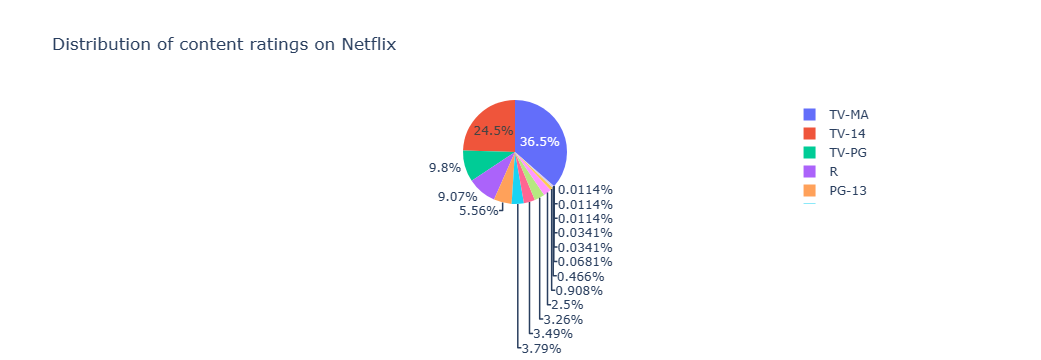

In [67]:
import plotly.express as px 
from textblob import TextBlob 
pieChart = px.pie(x, values='counts', names='rating', title='Distribution of content ratings on Netflix')
pieChart.show()

In [68]:
t = df.groupby(['duration']).size().reset_index(name='counts')
t

,duration,counts
0,1 Season,1793
1,10 Seasons,7
2,10 min,1
3,100 min,108
4,101 min,116
...,...,...
215,95 min,137
216,96 min,130
217,97 min,146
218,98 min,120


Farklı süre türleri: 6
     duration  counts
0    1 Season    1793
1  10 Seasons       7
2      10 min       1
3     100 min     108
4     101 min     116
5      95 min     137
En fazla geçen süre türleri:
     duration  counts
0    1 Season    1793
5      95 min     137
4     101 min     116
3     100 min     108
1  10 Seasons       7


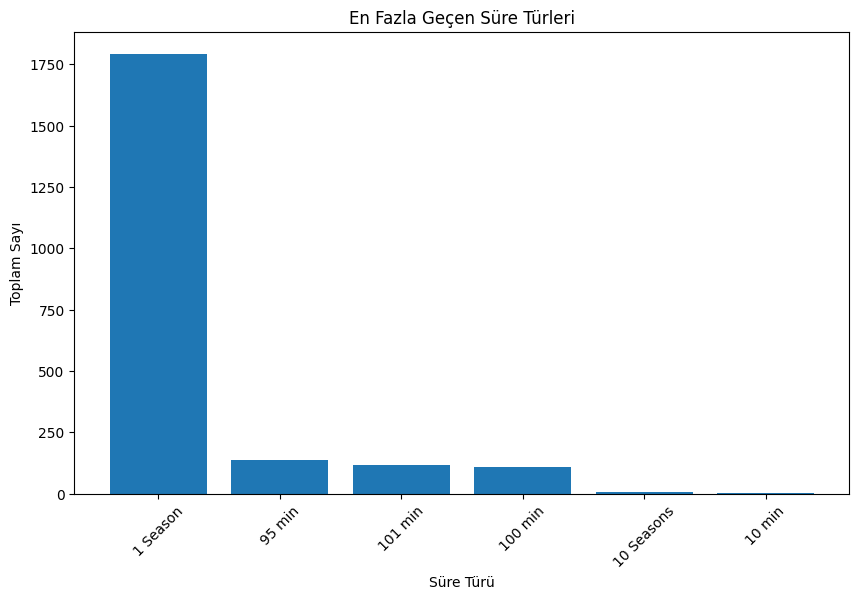

In [69]:
data = {
    'duration': ['1 Season', '10 Seasons', '10 min', '100 min', '101 min', '95 min'],
    'counts': [1793, 7, 1, 108, 116, 137]
}
dtf = pd.DataFrame(data)
unique_durations = dtf['duration'].nunique()
print(f"Farklı süre türleri: {unique_durations}")
duration_counts = dtf.groupby('duration')['counts'].sum().reset_index()
print(duration_counts)
top_durations = duration_counts.sort_values(by='counts', ascending=False)
print("En fazla geçen süre türleri:")
print(top_durations.head())
plt.figure(figsize=(10, 6))
plt.bar(top_durations['duration'], top_durations['counts'])
plt.xlabel('Süre Türü')
plt.ylabel('Toplam Sayı')
plt.title('En Fazla Geçen Süre Türleri')
plt.xticks(rotation=45)
plt.show()

In [70]:
df['duration'].fillna(
    df['type'].map({'TV Show': '1 Season', 'Movie': '95 min'}),
    inplace=True
)

In [71]:
g = df.groupby(['type']).size().reset_index(name='counts')
print(g)

      type  counts
0    Movie    6131
1  TV Show    2676


In [80]:
directors_list = pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [81]:
directors_list = df['director'].str.split(',', expand=True).stack()
print(directors_list)

0     0    Kirsten Johnson
2     0    Julien Leclercq
5     0      Mike Flanagan
6     0      Robert Cullen
      1     José Luis Ucha
                ...       
8801  0    Majid Al Ansari
8802  0      David Fincher
8804  0    Ruben Fleischer
8805  0       Peter Hewitt
8806  0        Mozez Singh
Length: 6978, dtype: object


In [82]:
directors_list = directors_list.to_frame()
print(directors_list)

                      0
0    0  Kirsten Johnson
2    0  Julien Leclercq
5    0    Mike Flanagan
6    0    Robert Cullen
     1   José Luis Ucha
...                 ...
8801 0  Majid Al Ansari
8802 0    David Fincher
8804 0  Ruben Fleischer
8805 0     Peter Hewitt
8806 0      Mozez Singh

[6978 rows x 1 columns]


In [83]:
directors_list.columns = ['Director']
print(directors_list)

               Director
0    0  Kirsten Johnson
2    0  Julien Leclercq
5    0    Mike Flanagan
6    0    Robert Cullen
     1   José Luis Ucha
...                 ...
8801 0  Majid Al Ansari
8802 0    David Fincher
8804 0  Ruben Fleischer
8805 0     Peter Hewitt
8806 0      Mozez Singh

[6978 rows x 1 columns]


In [84]:
directors = directors_list.groupby(['Director']).size().reset_index(name='Total Count')
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5115                Çagan Irmak            1
5116           Ísold Uggadóttir            1
5117        Óskar Thór Axelsson            1
5118           Ömer Faruk Sorak            2
5119               Şenol Sönmez            2

[5120 rows x 2 columns]


In [85]:
directors = directors[directors.Director != 'Director not specified']

In [86]:
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5115                Çagan Irmak            1
5116           Ísold Uggadóttir            1
5117        Óskar Thór Axelsson            1
5118           Ömer Faruk Sorak            2
5119               Şenol Sönmez            2

[5120 rows x 2 columns]


In [87]:
directors = directors.sort_values(by=['Total Count'], ascending = False)
print(directors)

             Director  Total Count
4020    Rajiv Chilaka           22
4067      Raúl Campos           18
261         Jan Suter           18
4651      Suhas Kadav           16
3235     Marcus Raboy           16
...               ...          ...
2340         J. Davis            1
2341  J. Lee Thompson            1
2342  J. Michael Long            1
609    Smriti Keshari            1
2560    Joaquín Mazón            1

[5120 rows x 2 columns]


In [88]:
top5Directors = directors.head()
print(top5Directors)

           Director  Total Count
4020  Rajiv Chilaka           22
4067    Raúl Campos           18
261       Jan Suter           18
4651    Suhas Kadav           16
3235   Marcus Raboy           16


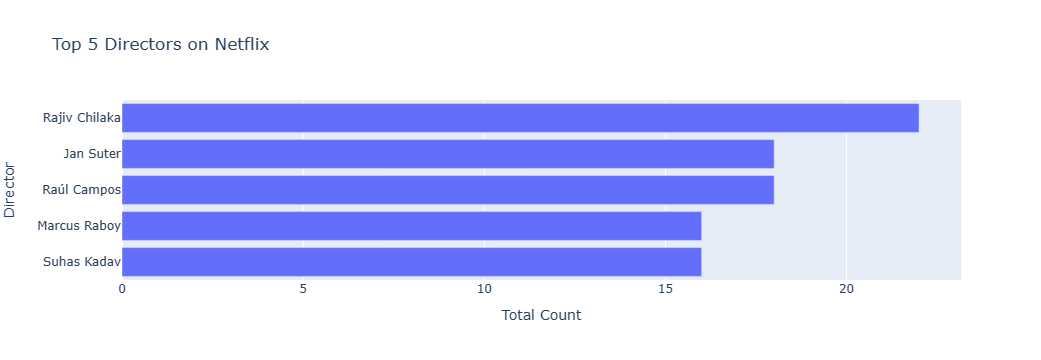

In [89]:
top5Directors = top5Directors.sort_values(by=['Total Count'])
barChart = px.bar(top5Directors, x='Total Count', y = 'Director', title = 'Top 5 Directors on Netflix')
barChart.show()

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['director'] = label_encoder.fit_transform(df['director'])
reversed_directors = label_encoder.inverse_transform(df['director'])
df['director'] = reversed_directors
label_encoder = LabelEncoder()
df['director'] = label_encoder.fit_transform(df['director'])
df['rating'] = label_encoder.fit_transform(df['rating'])



In [91]:
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df['duration'] = label_encoder.fit_transform(df['duration'])
df['listed_in'] = label_encoder.fit_transform(df['listed_in'])

features = ['type', 'duration', 'listed_in']
target = 'director'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


predicted_directors = model.predict(X_test)

missing_director_indices = df[df[target].isna()].index
for index, predicted_director in zip(missing_director_indices, predicted_directors):
    df.loc[index, target] = predicted_director


In [74]:
director_mapping = dict(zip(df['director'], df['director_original']))
df['director'] = df['director'].map(director_mapping)

In [92]:
print(df['director'].head(50))

0     2295
1     4528
2     2105
3     4528
4     4528
5     2866
6     3542
7     1504
8      299
9     4157
10    4528
11    2301
12     792
13     628
14    4528
15    4528
16    3230
17    4528
18      53
19    4528
20    3105
21    4528
22    2150
23     170
24    3653
25    4528
26    3397
27    1058
28    3791
29    3549
30     406
31    4528
32    4528
33    4528
34    4528
35     928
36     870
37    4528
38    1414
39    4528
40    4528
41    4020
42    1816
43    1908
44    2059
45    4285
46     908
47     638
48     349
49    4528
Name: director, dtype: int32


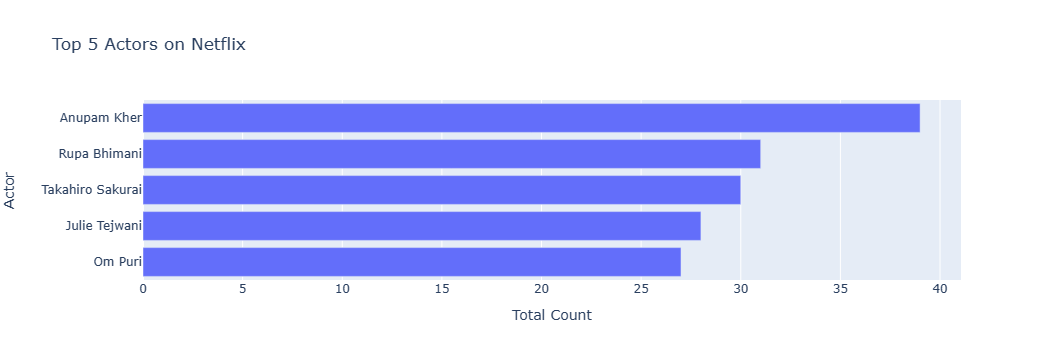

In [53]:
df['cast']=df['cast'].fillna('No cast specified')
cast_df = pd.DataFrame()
cast_df = df['cast'].str.split(',',expand=True).stack()
cast_df = cast_df.to_frame()
cast_df.columns = ['Actor']
actors = cast_df.groupby(['Actor']).size().reset_index(name = 'Total Count')
actors = actors[actors.Actor != 'No cast specified']
actors = actors.sort_values(by=['Total Count'], ascending=False)
top5Actors = actors.head()
top5Actors = top5Actors.sort_values(by=['Total Count'])
barChart2 = px.bar(top5Actors, x='Total Count', y='Actor', title='Top 5 Actors on Netflix')
barChart2.show()

In [54]:
df1 = df[['type', 'release_year']]
df1 = df1.rename(columns = {"release_year":"Release Year", "type": "Type"})
df2 = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total Count')

In [55]:
print(df2)

     Release Year  Type  Total Count
0            1925     1            1
1            1942     0            2
2            1943     0            3
3            1944     0            3
4            1945     0            3
..            ...   ...          ...
114          2019     1          397
115          2020     0          517
116          2020     1          436
117          2021     0          277
118          2021     1          315

[119 rows x 3 columns]


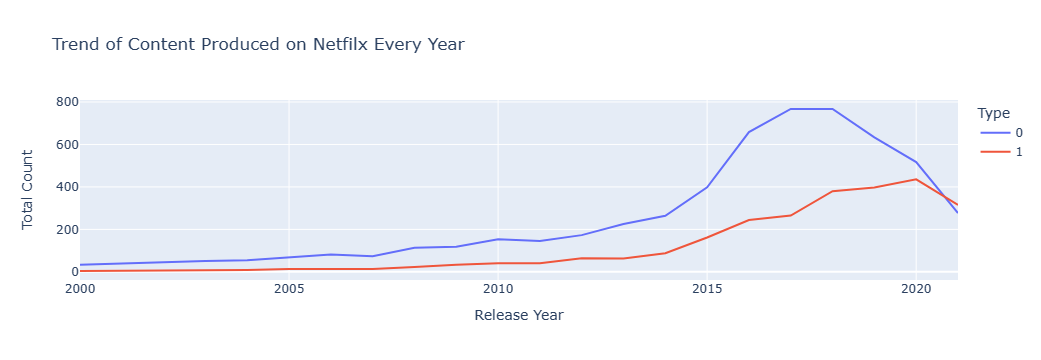

In [56]:
df2 = df2[df2['Release Year']>=2000]
graph = px.line(df2, x = "Release Year", y="Total Count", color = "Type", title = "Trend of Content Produced on Netfilx Every Year")
graph.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_11396\3228387545.py:13: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Positive' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



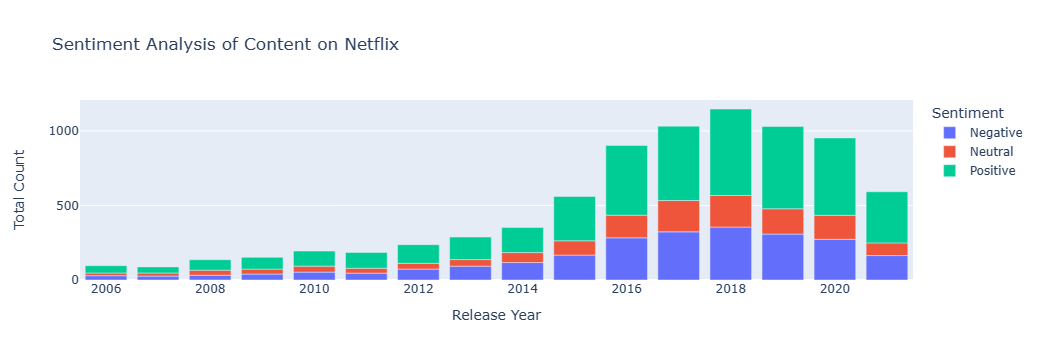

In [57]:
df3 = df[['release_year', 'description']]
df3 = df3.rename(columns = {'release_year':'Release Year', 'description':'Description'})
for index, row in df3.iterrows():
  d=row['Description']
  testimonial = TextBlob(d)
  p = testimonial.sentiment.polarity
  if p==0:
    sent = 'Neutral'
  elif p>0:
    sent = 'Positive'
  else:
    sent = 'Negative'
  df3.loc[[index, 2], 'Sentiment']=sent

df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name = 'Total Count')

df3 = df3[df3['Release Year']>2005]
barGraph = px.bar(df3, x="Release Year", y="Total Count", color = "Sentiment", title = "Sentiment Analysis of Content on Netflix")
barGraph.show()